In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html)**. 

Imports
------

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

**Important**: In this assignment we are using autograder so that you can get feedback on your solutions. For the autograder to work, you need to install `otter` in the course environment as follows. 

1. Go to the command line/terminal.
2. Activate the course conda environment and install otter-grader using the following commands.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. 

<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

> You will not be able to push it to your repository (hopefully) because I have seeded the repository wich `.gitignore`.

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
rubric={autograde}

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [3]:
spotify_df = pd.read_csv("spotify.csv", index_col=0)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

### 1.2 Number of training and test examples
rubric={autograde}

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [5]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [6]:
# Please provide numeric values
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]
print(f"number of training samples: {n_train_samples}")
print(f"number of test samples: {n_test_samples}")

number of training samples: 1613
number of test samples: 404


In [7]:
...

Ellipsis

In [8]:
...

Ellipsis

In [9]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

#### 1.3
rubric={autograde}

**Your tasks:**

1. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
spotify_summary = train_df.describe()
smallestRange = -1;
for column in spotify_summary:
    minVal = spotify_summary[column].values[3]
    maxVal = spotify_summary[column].values[7]
    rangeVal = maxVal - minVal
    if rangeVal < smallestRange or smallestRange == -1:
        smallestCol = column
        smallestRange = rangeVal

In [11]:
print(f"The column with the smallest range is: {smallestCol}")
smallest_range_feature = smallestCol

The column with the smallest range is: speechiness


In [12]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms 
rubric={points}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

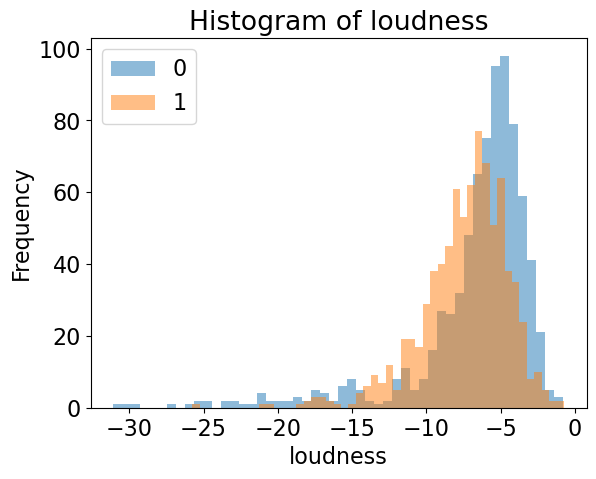

In [13]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 5

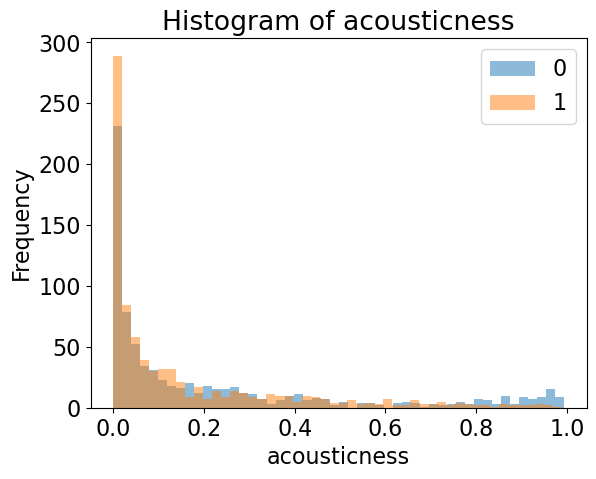

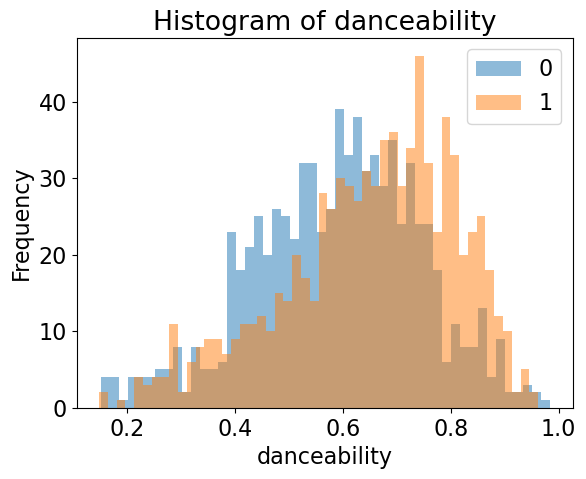

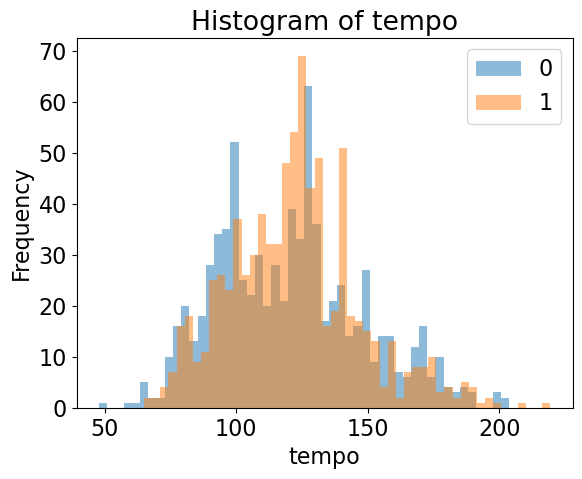

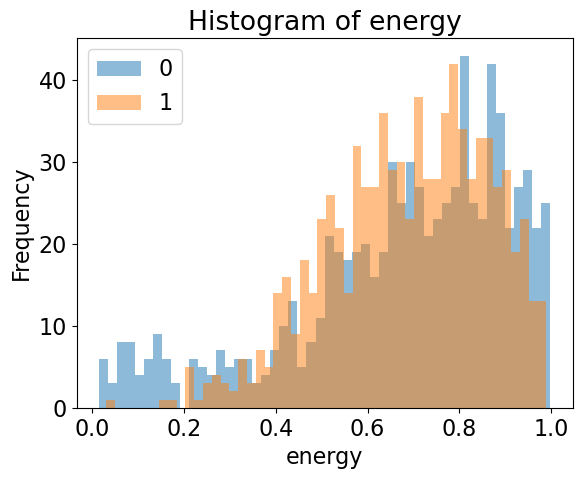

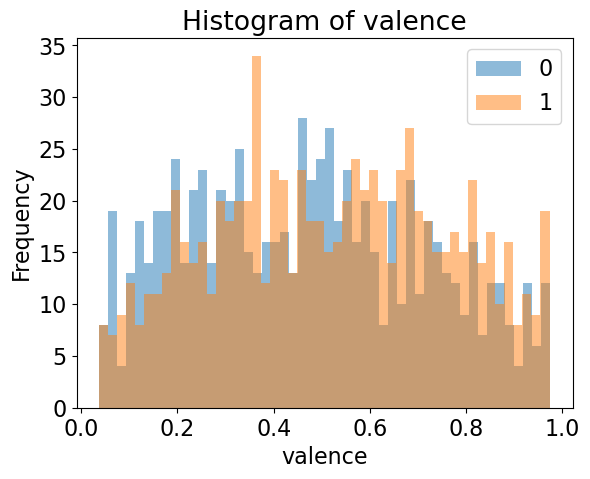

In [14]:
featArr = ["acousticness", "danceability", "tempo", "energy", "valence"]
# Historgram code taken from hw2 Question 1.4 description
for feat in featArr:
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms
rubric={points}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

If the particular feature and two target classes have identical histograms, the feature is not necessarily useless for predicting the target class. For example, if we made a histogram of frequency vs acousticness and the liked and disliked histograms were identical, we are only looking at the data in 2 dimensions. In this particular case, we have multiple dimensions of data. By looking at only the histograms of one feature, we can't be sure that another feature, say loudness, wouldn't have an effect on whether or not people like high or low acousticness. In general, we can't just assume that each feature is independent of all of the other features, so we can't assume that identical histograms equates to useless data.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include? 
rubric={reasoning}

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

Yes these features can be useful for predicting if the user liked the song or not. Song titles can be  indicative of genre or mood of the song, and its common that someone who likes one author's song will like another song by the same author. However, there would be some difficulty using these features in our model. Because these are object (string) types, rather than numeric, the computer won't be able to correctly interpret the feature without some sort of help from humans. Additional work would need to be done in order for the model to work with object types. 

<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1
rubric={autograde}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [15]:
# code taken from k-nearest neighbours example from notebook 5
X_train, y_train = (
    train_df.drop(columns=["song_title", "artist", "target"]),
    train_df["target"],
)
X_test, y_test = (
    test_df.drop(columns=["song_title", "artist", "target"]),
    test_df["target"],
)

In [16]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

### 2.2
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [17]:
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [18]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

### 2.3 
rubric={autograde}

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 2

In [19]:
pred = spotify_tree.predict(X_train.iloc[[0]]).min()
print(f"the class of the first example in our X_train is {pred}, which is the same as the true class from y_train, which is {y_train.iloc[0]}")


the class of the first example in our X_train is 1, which is the same as the true class from y_train, which is 1


In [20]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

### 2.4
rubric={autograde}

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 2

In [21]:
mean_cv_score = np.mean(cross_val_score(spotify_tree, X_train, y_train, cv=10))
print(f"The mean cross-validation accuracy is {mean_cv_score}")

The mean cross-validation accuracy is 0.6820105820105821


In [22]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5
rubric={autograde}

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 3

In [23]:
scores_df = pd.DataFrame(cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True))
scores_df

,fit_time,score_time,test_score,train_score
0,0.017958,0.000993,0.685185,0.999311
1,0.013996,0.000997,0.635802,0.998622
2,0.012966,0.000998,0.641975,0.999311
3,0.012930,0.000998,0.708075,0.998623
4,0.012965,0.000998,0.726708,0.998623
5,0.012965,0.000998,0.608696,0.998623
6,0.011968,0.000998,0.714286,0.998623
7,0.012966,0.001008,0.714286,0.999311
8,0.011967,0.001996,0.677019,0.999311
9,0.012965,0.000999,0.708075,0.998623


In [24]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.6
rubric={points}

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 2

1: There are 3 factors we can consider here. First that we performed the cross validation with 10 folds, second that we had a mean cross validation score of 0.68 and that we had a standard deviation of 0.038. Because of the respectable number of folds and the low standard deviation, we can conclude that the mean cross-validation score is trustworthy. Of course, if we had enough data to run the cross validation with even more folds, our resultant mean would be even more precise. 

2: Given the outputs below, I would say that because of the high training score and a sizeable gap between the test_scores and the train_score, we are likely overfitting our model. That means that our model is picking up on random quirks in the data that are not representative of the general data itself. This indicates that our model may not perform well on the test split and on deployment data.

In [25]:
print(np.mean(cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)["test_score"]))
print(np.std(cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)["test_score"]))
print(scores_df)

0.6820105820105821
0.03819421784648598
   fit_time  score_time  test_score  train_score
0  0.017958    0.000993    0.685185     0.999311
1  0.013996    0.000997    0.635802     0.998622
2  0.012966    0.000998    0.641975     0.999311
3  0.012930    0.000998    0.708075     0.998623
4  0.012965    0.000998    0.726708     0.998623
5  0.012965    0.000998    0.608696     0.998623
6  0.011968    0.000998    0.714286     0.998623
7  0.012966    0.001008    0.714286     0.999311
8  0.011967    0.001996    0.677019     0.999311
9  0.012965    0.000999    0.708075     0.998623


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
2. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding. 


> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [26]:
depths = np.arange(1, 25, 2)
depths
testScores = []
trainScores = []
for i in depths:
    spotify_tree = DecisionTreeClassifier(random_state=123, max_depth = i)
    testScore = np.mean(cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)["test_score"])
    trainScore =  np.mean(cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)["train_score"])
    testScores.append(testScore)
    trainScores.append(trainScore)


<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 10

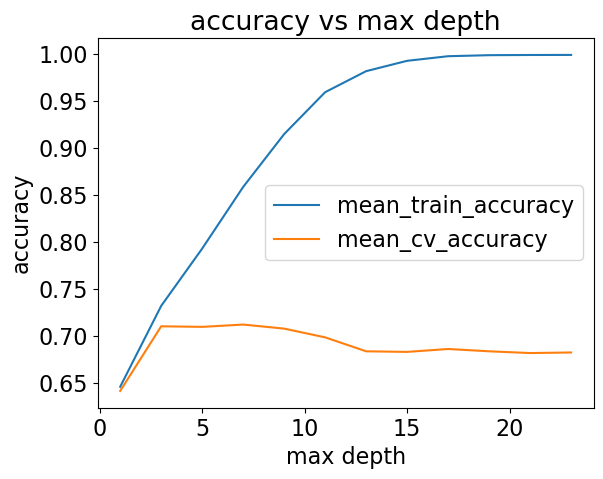

In [27]:
# max_depth_plot: the figure plotted for this exercise
# Plot code structure taken from the course notebook 3, Overfitting section.
results_dict = {
    "depth": [],
    "mean_train_accuracy": [],
    "mean_cv_accuracy": []
}
for depth in depths:
    spotify_tree = DecisionTreeClassifier(random_state=123, max_depth = depth)
    scores = cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_accuracy"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_accuracy"].append(np.mean(scores["train_score"]))
    
results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")

max_depth_plot = results_df[["mean_train_accuracy", "mean_cv_accuracy"]].plot(xlabel = "max depth", ylabel="accuracy", title = "accuracy vs max depth")


In [28]:
max_depth_plot.legend().get_texts()[0].get_text()

'mean_train_accuracy'

In [29]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 `max_depth` and the fundamental tradeoff
rubric={reasoning}

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 2

Based on the plot generated in question 3.1, we can see that increasing the max_depth will cause our training accuracy to increase until we reach an accuracy of 1. Our cross validation accuracy on the other hand will increase to a point (about max_depth = 4) before starting to decrease. In general, we also see that the gap between the training accuracy and cross validation accuracy increases as the max depth increases.

<!-- END QUESTION -->

<br><br>

### 3.3 Picking a reasonable value for `max_depth`
rubric={autograde}

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 2

In [30]:
print(results_df["mean_cv_accuracy"])
print(results_df["mean_cv_accuracy"].max())
print("It would be resonable to choose a depth that gave us the highest cross-validation score, as long as we are not under or overfitting. In this case, a depth of 7 gives us the maximum cross validation score while also leaving the gap between the training score and the cross validation score reasonably small")
best_max_depth = 7


depth
1     0.641063
3     0.709888
5     0.709271
7     0.711740
9     0.707419
11    0.698106
13    0.683253
15    0.682636
17    0.685714
19    0.683249
21    0.681393
23    0.682011
Name: mean_cv_accuracy, dtype: float64
0.7117398972471436
It would be resonable to choose a depth that gave us the highest cross-validation score, as long as we are not under or overfitting. In this case, a depth of 7 gives us the maximum cross validation score while also leaving the gap between the training score and the cross validation score reasonably small


In [31]:
grader.check("q3.3")

q3.3 results: All test cases passed!

<br><br>

### 3.4 Final assessment on the test set
rubric={autograde}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**
1. Train a decision tree classifier using the optimal _max_depth_ you chose in the previous exercise on the entire training set.
2. Compute and store it in a variable called `test_score`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 3

In [32]:

spotify_tree = DecisionTreeClassifier(random_state=123, max_depth = 7)
spotify_tree.fit(X_train, y_train)
test_score = spotify_tree.score(X_test, y_test)
print(f"The test_score value is: {test_score}")
...

The test_score value is: 0.6881188118811881


Ellipsis

In [33]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Analysis
rubric={points}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 5

1: The test score was 0.68811 and the cross validation score with the same max_depth of 7 was 0.711740. Because the test score was resonably high while being close to the cross validation score, we can conclude that we did not over or underfit our model.
2: We can not violate the golden rule, which states that the test data can not influence the training phase in any way. If we break this rule, we will likely get misleading results that do not generalize real data correctly.
3: No, I do not think the max_depth we chose would generalize to other spotify datasets. Max depth is a hyperparameter used to optimize our machine learning model on a particular set of data. With another set of data, we would need to different values for hyperparameters in order to get good results. Just think: if we could generalize hyperparameters to other datasets, why would we need to set them in the first place?

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions
rubric={points}

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 3

1. Looking at the first column of X, we can see that there are 2 examples where the first feature is less than 5.5 and the target is false. There is also 1 case where the first feature is less than 5.5 and the target is true. Because there are more cases where the first feature being less than 5.5 results in a false target, we would predict false.

2. Given that there is only 1 case where the first feature is less than 5.5 and the target is true, our stump would return an error of 1/6, with 6 being the total number of rows. To get the accuracy, we simply do 1 - 1/6, which gives us 5/6.

3. We would not be able to attain 100% accuracy with a stump like in this example. We can look at the target values and try to split the rows into ranges. In order to maintain 100% accuracy we would need 3 ranges. One for the range where the first feature is equal to 2, one for the range where the first feature is from 4 to 5, and one range for when the first feature is from 9 to 10. Our decision stump can only attain 100% accuracy when our data only has 2 of these ranges. We would need another layer to our tree to have 100% accuracy for this set of data. 

<!-- END QUESTION -->

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/117814). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
4. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

Congratulations on working with your first machine learning model! Well done 👏👏!